In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle


In [2]:
data = pd.read_csv('./cgpa_package.csv')


In [3]:
df = pd.DataFrame(data)

In [4]:
X = df[['cgpa']]
y= df[['package']]

Text(0.5, 0, 'CGPA')

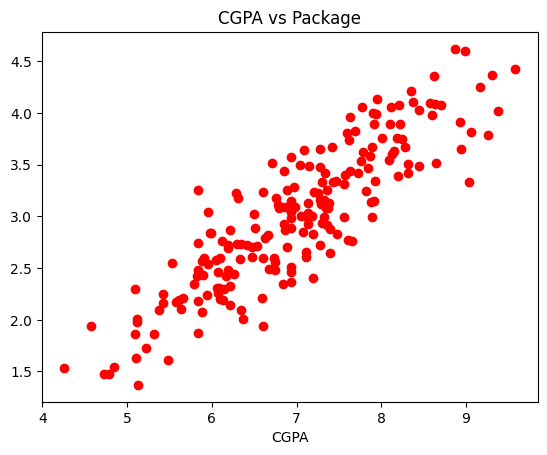

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color = 'red')
plt.title('CGPA vs Package')
plt.xlabel('CGPA')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred


array([[2.97012606],
       [2.55516816],
       [2.61856451],
       [3.40237388],
       [3.05657563],
       [2.35921582],
       [3.51763996],
       [2.4687186 ],
       [4.1227869 ],
       [3.21794814],
       [2.12868365],
       [3.19489493],
       [2.53787825],
       [3.05081232],
       [3.36779405],
       [2.86062328],
       [2.63009112],
       [2.82028015],
       [2.37074243],
       [2.91825632],
       [3.1660784 ],
       [2.3361626 ],
       [3.50611335],
       [3.9902309 ],
       [2.20360661],
       [1.90967809],
       [3.08539215],
       [2.6070379 ],
       [1.9212047 ],
       [1.90391479],
       [2.91249302],
       [3.69630239],
       [2.60127459],
       [2.09410383],
       [2.50906173],
       [3.64443265],
       [3.17184171],
       [2.97012606],
       [3.83462169],
       [2.50329842]])

Text(0.5, 0, 'CGPA')

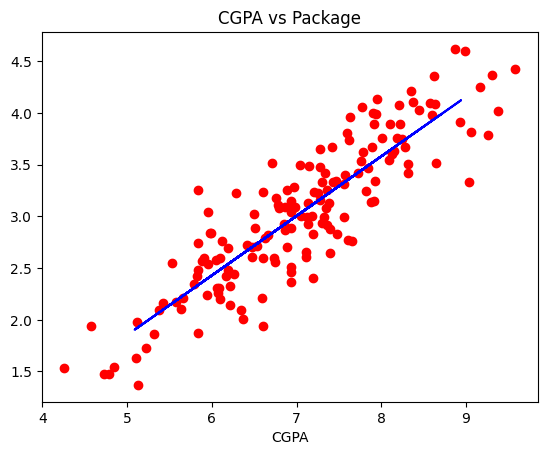

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('CGPA vs Package')
plt.xlabel('CGPA')


In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.10221131059334207
0.25524334486204087
0.7297167943957027


# r2 score formula
## r2 = 1 - (sum of residuals/sum of total sum of squares)

In [10]:
# calculate r2 score using formula
y_mean = np.mean(y_test)
ssr = 0
sst = 0
for i in range(len(y_test)):
    ssr += (y_test.iloc[i] - y_pred[i])**2
    sst += (y_test.iloc[i] - y_mean)**2
r2 = 1 - (ssr/sst)
print(r2)


package    0.729717
Name: 18, dtype: float64


# Adjusted r2 Score
##  adjusted r2 score = 1- (1-r^2)*(n-1)/(n-p-1)

In [11]:
# adjusted r2 score = 1- (1-r^2)*(n-1)/(n-p-1)

adjusted_r_sqaured = 1 -(1-r2_score(y_test, y_pred))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_r_sqaured)

0.7283517277007314


In [12]:
new_df1 = df.copy()
new_df1['random_features'] = np.random.random(200)
new_df1


,cgpa,package,random_features
0,6.89,3.26,0.661083
1,5.12,1.98,0.189211
2,7.82,3.25,0.506635
3,7.42,3.67,0.843811
4,6.94,3.57,0.472035
...,...,...,...
195,6.93,2.46,0.576061
196,5.89,2.57,0.673947
197,7.21,3.24,0.257989
198,7.63,3.96,0.256447


In [13]:
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test)

In [18]:
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  -0.02810479094663032


In [19]:
print('Adjusted R2 Score: ', 1 - (1-r2_score(y_test, y_pred))*(len(y)-1)/(len(y)-X.shape[1]-1))

Adjusted R2 Score:  -0.03854240303745904


In [20]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [21]:
new_df2.sample(5)

,cgpa,iq,package
149,8.28,3.47,3.67
44,5.09,2.36,1.86
178,8.15,4.43,3.63
92,7.90,4.20,4.00
3,7.42,4.57,3.67


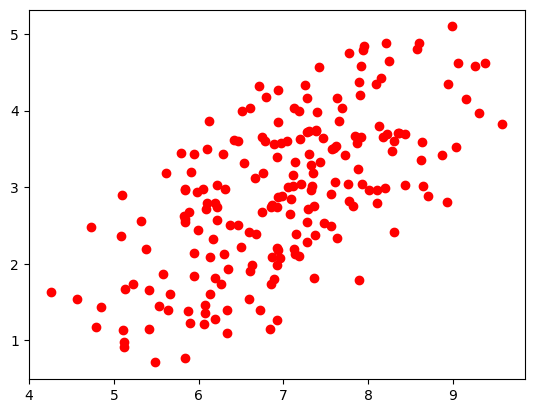

In [22]:
plt.scatter(new_df2['cgpa'], new_df2['iq'], color = 'red')

In [23]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:, -1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
print('R2 Score: ', r2_score(y_test, y_pred))   

R2 Score:  0.8063788074586019


In [29]:
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)